Last Appointment -- All Patients

Generate Graphs of:

Age Distribution
Gender Distribution
Ethnicity Breakdown
Smoker Status
Alcohol Consumption (Y/N/Unknown)
Illegal Drug Use (Y/N/Unknown)
Sexually Active (Y/N/Unknown)

In [1]:
import pandas as pd
import warnings
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
warnings.filterwarnings('ignore')

In [2]:
merging_data = pd.read_csv("patients_with_labels.csv", delimiter=";")
import math
merging_data['label_age'] = pd.cut(merging_data['Age'], bins= [-math.inf, 25, 40, 60, math.inf],
                                   labels= [0,1,2,3], include_lowest=True)

In [3]:
merging_data["label_ethnicity"] = merging_data['pt_race']
cleanup_ethnicity = {"label_ethnicity": {"White": 0, "Black Or African American": 1, "Asian": 2, 
                                         "WHITE": 0, "American Indian Or Alaska Native": 3,
                                         "Native Hawaiian Or Other Pacific Islander": 4, "Unknown": 5, "Other":5 }}
merging_data.replace(cleanup_ethnicity, inplace=True)

merging_data["label_sex"] = merging_data['pt_sex']
cleanup_sex = {"label_sex": {"Female": 0, "FEMALE": 0, "MALE": 1, 
                                         "Male": 1, "Unknown": 2 }}
merging_data.replace(cleanup_sex, inplace=True)

In [4]:
merging_data['label_smoker'] = merging_data['soc_hx_smoke_stts']
cleanup_smokers = {"label_smoker": {"NEVER SMOKER": 0, "FORMER SMOKER": 0, "CURRENT EVERY DAY SMOKER": 2, 
                                    "CURRENT SOME DAY SMOKER": 1, "NEVER ASSESSED": 3,
                                    "PASSIVE SMOKE EXPOSURE - NEVER SMOKER": 0, "LIGHT TOBACCO SMOKER":1,
                                    "HEAVY TOBACCO SMOKER": 2, "UNKNOWN IF EVER SMOKED": 3, 
                                         "SMOKER, CURRENT STATUS UNKNOWN":1 }}
merging_data.replace(cleanup_smokers, inplace=True)

In [10]:
merging_data['soc_hx_dt_m'] = pd.to_datetime(merging_data['soc_hx_dt_m'])
patients_2 = merging_data.set_index(['studyid', 'soc_hx_dt_m'])
patients_2 = patients_2.reset_index()
first = patients_2.groupby('studyid').last()
first.head()

In [12]:
first_appt = first[['studyid', 'label_age','pt_status','label_sex','label_ethnicity',
                    'soc_hx_dt_m', 'label_smoker','soc_hx_alc_yn','soc_hx_ill_drug_yn','soc_hx_sexual_act_yn']]

In [13]:
age_labels = ['0-25', '26-40', '41-60', '60+']
sex_labels = ['Female', 'Male', 'Unknown']
ethnicity_labels = ['White', 'Black', 'Asian', 'American Indian', 'Pacific Islander', 'Unknown']
smoke_labels = ['Non-Smoker', 'Light Smoker', 'Heavy Smoker', 'Unknown']
alc_labels = ['No', 'Yes', 'Unknown']
drug_labels = ['No', 'Yes', 'Unknown']
sex_activity_labels = ['No', 'Yes', 'Unknown']
labels = [age_labels, sex_labels, ethnicity_labels, smoke_labels, alc_labels, drug_labels, sex_activity_labels]
attributes = ['label_age','label_sex','label_ethnicity',
            'label_smoker','soc_hx_alc_yn','soc_hx_ill_drug_yn','soc_hx_sexual_act_yn']
xlabels = ['Age Group', 'Sex', 'Ethnicity', 'Smoker Status', 'Consumes Alcohol', 'Uses Illegal Drugs', 'Sexually Active']

In [14]:
first_appt.fillna(9.)

,studyid,label_age,pt_status,label_sex,label_ethnicity,soc_hx_dt_m,label_smoker,soc_hx_alc_yn,soc_hx_ill_drug_yn,soc_hx_sexual_act_yn
0,PT1,3,ALIVE,1,1,2015-06-28,0,1.0,0.0,9.0
1,PT10,1,ALIVE,0,0,2014-01-24,0,0.0,0.0,1.0
2,PT100,3,ALIVE,0,0,2015-11-04,0,1.0,9.0,9.0
3,PT1000,1,ALIVE,1,0,2015-01-13,0,0.0,0.0,1.0
4,PT10000,3,ALIVE,0,0,2003-11-08,0,0.0,0.0,0.0
5,PT100000,3,ALIVE,0,0,2004-02-11,0,0.0,0.0,1.0
6,PT100001,2,ALIVE,0,0,2015-04-06,2,0.0,0.0,9.0
7,PT100002,1,ALIVE,0,0,2010-08-01,0,9.0,9.0,9.0
8,PT100003,2,ALIVE,1,0,2015-12-04,2,0.0,0.0,9.0
9,PT100004,3,ALIVE,0,0,2016-07-14,0,0.0,0.0,9.0


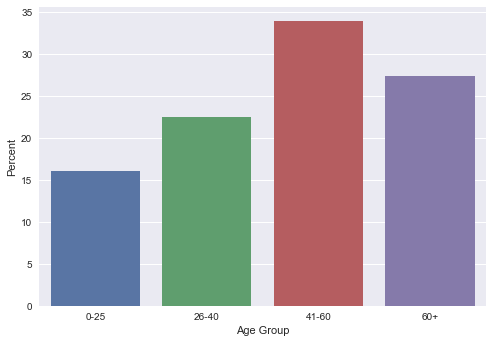

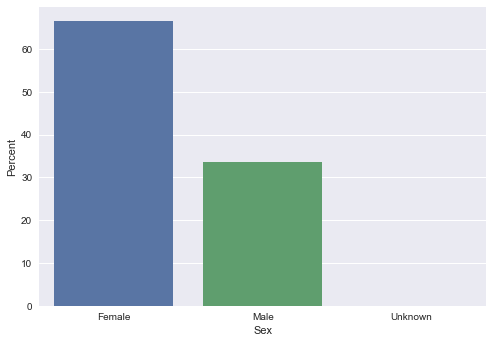

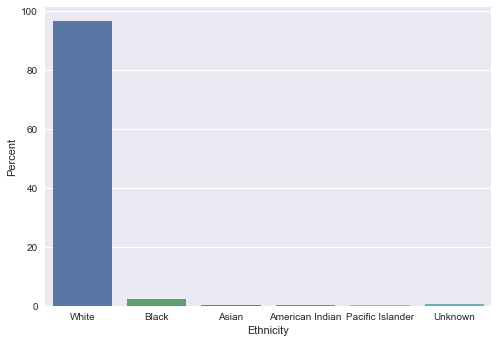

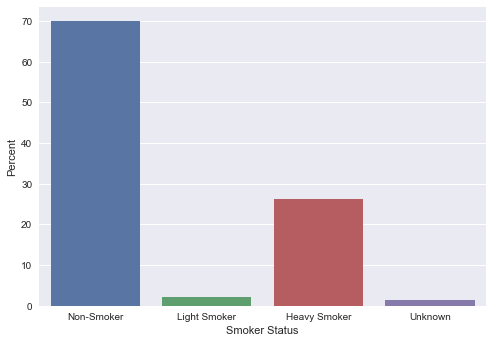

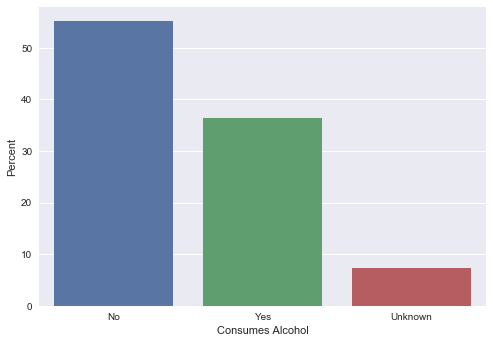

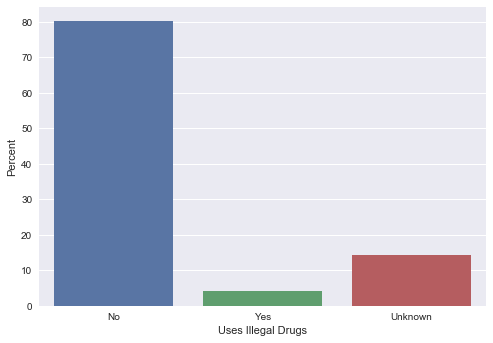

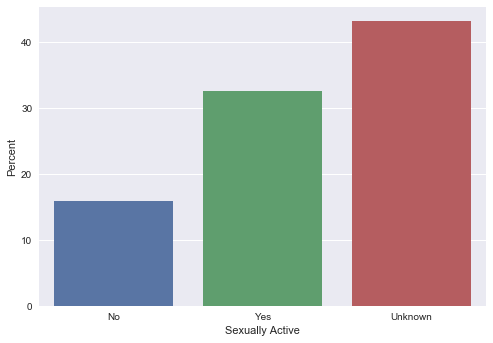

In [15]:
for i in [0, 1, 2, 3, 4, 5, 6]:
    ax = sns.barplot(x=attributes[i], y=attributes[i], data=first_appt, 
                     estimator=lambda x: len(x) / len(first_appt) * 100)
    ax.set(ylabel="Percent")
    ax.set(xlabel=xlabels[i])
    ax.set_xticklabels(labels[i])
    plt.show()